## Dimensionality Reduction 
### Nikhil Kudupudi

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#for this project i have taken mtcars data from kaggle 
#link to download data-'https://www.kaggle.com/ruiromanini/mtcars'
df= pd.read_csv('mtcars.csv')

In [3]:
df.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [5]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [28]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [4]:
attributes=['disp','hp','drat','wt','qsec']

In [5]:
x=df.loc[:,attributes]
x.head(2)

,disp,hp,drat,wt,qsec
0,160.0,110,3.9,2.620,16.46
1,160.0,110,3.9,2.875,17.02


In [6]:
y=df.loc[:,['cyl']]
y.head(2)

,cyl
0,6
1,6


In [7]:
#standardising data 
x = StandardScaler().fit_transform(x)

In [8]:
#converting array into dataframe 
x=pd.DataFrame(x)
x.columns=attributes
x.head(3)

,disp,hp,drat,wt,qsec
0,-0.579750,-0.543655,0.576594,-0.620167,-0.789601
1,-0.579750,-0.543655,0.576594,-0.355382,-0.471202
2,-1.006026,-0.795570,0.481584,-0.931678,0.432823


In [9]:
# eigen values and variance  
model=PCA(n_components=5)
model.fit_transform(x)

array([[ 8.70610171e-01,  9.18568424e-01, -3.25889738e-01,
        -4.60527197e-01,  2.28447934e-01],
       [ 8.36889414e-01,  5.94993942e-01, -9.39612926e-02,
        -3.90107245e-01,  3.11521738e-01],
       [ 1.68969571e+00,  6.24270554e-03, -2.58708907e-01,
         9.08852821e-02,  4.47356073e-02],
       [ 9.89299282e-03, -1.33359622e+00, -5.15555585e-01,
        -2.81028956e-03, -2.88490726e-01],
       [-1.36038001e+00, -5.54799554e-02, -4.28488276e-01,
        -2.12356059e-01, -4.60776718e-01],
       [-5.36621515e-02, -2.02871047e+00, -7.79025460e-01,
         2.58017833e-01,  3.30291551e-03],
       [-2.07782553e+00,  8.12372789e-01, -3.03336904e-01,
         2.77827597e-01, -2.77775807e-01],
       [ 1.41676349e+00, -1.19878074e+00,  1.67425698e-01,
        -2.28888991e-01,  2.30149780e-01],
       [ 1.89385425e+00, -2.05260252e+00,  1.12891655e+00,
         7.86800602e-01, -2.59951846e-01],
       [ 6.58635804e-01, -6.07315180e-02,  5.05590716e-01,
        -1.04969819e-01

In [10]:
#variance/eigen values  
print(model.explained_variance_)
print('\n')

#Variance ratio 
print(model.explained_variance_ratio_)
print('\n')

#cumulative variance ratio 
model.explained_variance_ratio_.cumsum()

[3.44644749 1.18022658 0.33447472 0.12946966 0.07067187]


[0.6677492  0.2286689  0.06480448 0.02508475 0.01369267]




array([0.6677492 , 0.8964181 , 0.96122258, 0.98630733, 1.        ])

In [11]:
#displaying eigen vector 
model.components_

array([[-0.52637855, -0.48259608,  0.41116334, -0.4831423 ,  0.29587983],
       [-0.08526183,  0.34188979,  0.45820293, -0.31871641, -0.75120684],
       [ 0.18426076,  0.19389225,  0.7707453 ,  0.46882198,  0.33854307],
       [-0.39604706,  0.77985983, -0.14468681, -0.22207508,  0.40584943],
       [-0.72446583, -0.06660961, -0.07753835,  0.62919153, -0.26233232]])

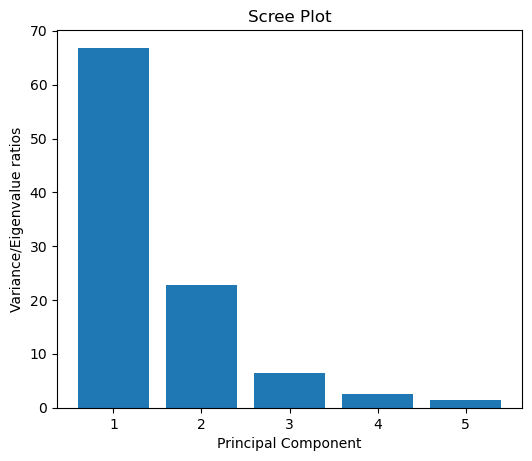

In [12]:
#scree plot 
#plotting variance ratio 
plt.figure(figsize=(6,5), dpi =100)
plt.bar(np.arange(1,6),model.explained_variance_ratio_*100)
plt.xticks([1,2,3,4,5])
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance/Eigenvalue ratios')
plt.show()

In [29]:
# from scree plot and cumulative varaince ratio we can see that pca1 and pca 2 account for 90% of the variation 

In [13]:
pca=PCA(n_components=2)

In [14]:
principlecomponents=pca.fit_transform(x)

In [15]:
print(pca.explained_variance_ratio_)
pca.components_

[0.6677492 0.2286689]


array([[-0.52637855, -0.48259608,  0.41116334, -0.4831423 ,  0.29587983],
       [-0.08526183,  0.34188979,  0.45820293, -0.31871641, -0.75120684]])

In [66]:
Fdf= pd.DataFrame(principlecomponents, columns=['Principal Component 1','Principal Component 2'])
Fdf=pd.concat([Fdf,y],axis=1)

In [70]:
Fdf.head()

,Principal Component 1,Principal Component 2,cyl
0,0.870610,0.918568,6
1,0.836889,0.594994,6
2,1.689696,0.006243,4
3,0.009893,-1.333596,6
4,-1.360380,-0.055480,8


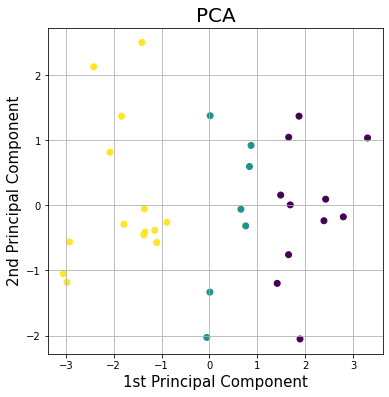

In [76]:
fig = plt.figure(figsize = (6,6))
plt.scatter(Fdf['Principal Component 1'],Fdf['Principal Component 2'] ,c= Fdf.cyl)

plt.title('PCA', fontsize = 20)
plt.xlabel('1st Principal Component', fontsize = 15)
plt.ylabel('2nd Principal Component', fontsize = 15)
plt.grid()
plt.show()